<a href="https://colab.research.google.com/github/Emma-Karenina-Martinez/Proyecto-6---An-lisis-de-una-empresa-de-telecomunicaciones/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
print(plans.head(5))

  plan_name  messages_included  gb_per_month  minutes_included  \
0    Basico                100             5               100   
1   Premium                500            20               600   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
0               12         1.2             0.08            0.10  
1               25         1.0             0.05            0.07  


In [ ]:
# mostrar las primeras 5 filas de users
print(users.head(5))

   user_id first_name last_name  age      city                       reg_date  \
0    10000     Carlos    Garcia   38  Medellín  2022-01-01 00:00:00.000000000   
1    10001      Mateo    Torres   53         ?  2022-01-01 06:34:17.914478619   
2    10002      Sofia   Ramirez   57      CDMX  2022-01-01 13:08:35.828957239   
3    10003      Mateo   Ramirez   69    Bogotá  2022-01-01 19:42:53.743435858   
4    10004      Mateo    Torres   63       GDL  2022-01-02 02:17:11.657914478   

      plan churn_date  
0   Basico        NaN  
1   Basico        NaN  
2   Basico        NaN  
3  Premium        NaN  
4   Basico        NaN  


In [ ]:
# mostrar las primeras 5 filas de usage
print(usage.head(5))

   id  user_id  type                           date  duration  length
0   1    10332  call  2024-01-01 00:00:00.000000000      0.09     NaN
1   2    11458  text  2024-01-01 00:06:30.969774244       NaN    39.0
2   3    11777  text  2024-01-01 00:13:01.939548488       NaN    36.0
3   4    10682  call  2024-01-01 00:19:32.909322733      1.53     NaN
4   5    12742  call  2024-01-01 00:26:03.879096977      4.84     NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        40000 non-null  int64         
 1   user_id   40000 non-null  int64         
 2   type      40000 non-null  object        
 3   date      39950 non-null  datetime64[ns]
 4   duration  17924 non-null  float64       
 5   length    22104 non-null  float64       
 6   is_text   40000 non-null  int64         
 7   is_call   40000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 2.4+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print("Cantidad de valores nulos en users:")
print(users.isna().sum())

# Proporción de valores nulos)
print("\nProporción de valores nulos en users:")
print(users.isna().mean())


Cantidad de valores nulos en users:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos en users:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print("\nCantidad de valores nulos en usage:")
print(usage.isna().sum())
print("\nProporción de valores nulos en usage:")
print(usage.isna().mean())


Cantidad de valores nulos en usage:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos en usage:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- Dataset users:
city: 469 valores nulos (11.73% de los datos)
churn_date: 3,534 valores nulos (88.35% de los datos)

- Dataset usage:
date: 50 valores nulos (0.13% de los datos)
duration: 22,076 valores nulos (55.19% de los datos)
length: 17,896 valores nulos (44.74% de los datos)

- Indica qué harías: ¿imputar, eliminar, ignorar?
- Dataset users:
city (11.73% nulos): Investigar para imputar con "Ciudad desconocida" o el valor más frecuente, ya que está en el rango de 5-30%.
churn_date (88.35% nulos): Mantener como está, ya que representa usuarios activos (no han abandonado el servicio).

- Dataset usage:
date (0.13% nulos): Imputar o eliminar registros, ya que es menos del 5% y es información crítica.
duration (55.19% nulos): Investigar si corresponde a mensajes (que no tienen duración) antes de decidir acción.
length (44.74% nulos): Investigar si corresponde a llamadas (que no tienen longitud de mensaje) antes de decidir acción.
Observación importante: Los nulos en duration y length probablemente son normales según el tipo de comunicación (llamadas vs mensajes).

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
print("=== RESUMEN ESTADÍSTICO - DATASET USERS ===")
users_numeric = users.describe()
print(users_numeric)
print("\n=== ANÁLISIS DETALLADO ===")
print("Columna user_id:")
print(f"Rango: {users['user_id'].min()} - {users['user_id'].max()}")
print(f"Valores únicos: {users['user_id'].nunique()}")
print(f"Total de registros: {len(users)}")

print("\nColumna age:")
print(f"Rango: {users['age'].min()} - {users['age'].max()}")
print(f"Valores únicos: {users['age'].nunique()}")
print(f"Valores negativos: {(users['age'] < 0).sum()}")
print(f"Valores mayores a 100: {(users['age'] > 100).sum()}")

=== RESUMEN ESTADÍSTICO - DATASET USERS ===
            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000

=== ANÁLISIS DETALLADO ===
Columna user_id:
Rango: 10000 - 13999
Valores únicos: 4000
Total de registros: 4000

Columna age:
Rango: -999 - 79
Valores únicos: 63
Valores negativos: 55
Valores mayores a 100: 0


- La columna `user_id`
-  user_id: Funciona correctamente como identificador único (4000 valores únicos para 4000 registros)
- La columna `age`
- age: Contiene 55 valores sentinel de -999, claramente inválidos ya que las edades no pueden ser negativas

In [ ]:
# explorar columnas numéricas de usage
print("=== RESUMEN ESTADÍSTICO - DATASET USAGE ===")
usage_numeric = usage.describe()
print(usage_numeric)

=== RESUMEN ESTADÍSTICO - DATASET USAGE ===
                id       user_id      duration        length
count  40000.00000  40000.000000  17924.000000  22104.000000
mean   20000.50000  12002.405975      5.202237     52.127398
std    11547.14972   1157.279564      6.842701     56.611183
min        1.00000  10000.000000      0.000000      0.000000
25%    10000.75000  10996.000000      1.437500     37.000000
50%    20000.50000  12013.000000      3.500000     50.000000
75%    30000.25000  13005.000000      6.990000     64.000000
max    40000.00000  13999.000000    120.000000   1490.000000


- Las columnas `id`  
-  user_id: Funciona correctamente como identificador único (4000 valores únicos para 4000 registros)
- Las columnas`user_id`
-  user_id: Funciona como clave foránea válida, conecta correctamente con el dataset users

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print("=== COLUMNAS CATEGÓRICAS - DATASET USERS ===")
for col in columnas_user:
    print(f"\nColumna {col}:")
    print(f"Valores únicos: {users[col].nunique()}")
    print("Valores y frecuencias:")
    print(users[col].value_counts())
    print("Valores únicos completos:")
    print(users[col].unique())

=== COLUMNAS CATEGÓRICAS - DATASET USERS ===

Columna city:
Valores únicos: 7
Valores y frecuencias:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
Valores únicos completos:
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']

Columna plan:
Valores únicos: 2
Valores y frecuencias:
Basico     2595
Premium    1405
Name: plan, dtype: int64
Valores únicos completos:
['Basico' 'Premium']


- La columna `city` ...
- city: Contiene 96 registros con "?" como valor sentinel, además de valores NaN
- La columna `plan` ...
- plan: Columna limpia con solo valores válidos ("Basico" y "Premium")

In [ ]:
# explorar columna categórica de usage
usage['type'] # completa el código
print("=== COLUMNA CATEGÓRICA - DATASET USAGE ===")
print("Columna type:")
print(f"Valores únicos: {usage['type'].nunique()}")
print("Valores y frecuencias:")
print(usage['type'].value_counts())
print("Valores únicos completos:")
print(usage['type'].unique())

=== COLUMNA CATEGÓRICA - DATASET USAGE ===
Columna type:
Valores únicos: 2
Valores y frecuencias:
text    22092
call    17908
Name: type, dtype: int64
Valores únicos completos:
['call' 'text']


- La columna `type` ...
 type: Columna limpia con solo valores válidos ("call" y "text")

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
age: 55 valores de -999 (sentinel para datos faltantes)
city: 96 valores con "?" (sentinel para ciudad desconocida)

- ¿Qué acción tomarías?
Para age (-999): Convertir a NaN y luego imputar con la mediana (47 años) o eliminar registros si es crítico para el análisis
Para city ("?"): Convertir a NaN y luego imputar con "Ciudad desconocida" o la ciudad más frecuente (Bogotá)
Justificación: Los valores sentinel (-999 y "?") son claramente marcadores de datos faltantes que deben tratarse como NaN para un análisis correcto.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [ ]:

# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')


In [ ]:

# Revisar los años presentes en `reg_date` de users
print("Años en reg_date:")
print(users['reg_date'].dt.year.value_counts().sort_index())


Años en reg_date:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.
Se encontraron 40 registros del año 2026, habla de registros futuros de un año que aun no ha pasado.

In [ ]:
# Revisar los años presentes en `date` de usage
print("\nAños en date:")
print(usage['date'].dt.year.value_counts().sort_index())


Años en date:
2024.0    39950
Name: date, dtype: int64


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  Sí, encontré 40 registros con año 2026 en la columna reg_date. Estos son años futuros imposibles, ya que los datos fueron registrados hasta 2024.
  
- ¿Qué harías con ellas?

Recomendación: Convertir las fechas de 2026 a NaN y luego:

Opción 1: Imputar con una fecha aleatoria dentro del rango válido (2022-2024)
Opción 2: Imputar con la fecha más frecuente o la mediana
Opción 3: Eliminar los 40 registros si representan menos del 1% de los datos
Justificación: Las fechas futuras (2026) son claramente errores de captura de datos y no pueden ser válidas para el análisis.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'][users['age'] != -999].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
print("Estadísticas de age después de la limpieza:")
print(users['age'].describe())

Estadísticas de age después de la limpieza:
count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64


In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
print("Valores únicos en city después de la limpieza:")
print(users['city'].value_counts(dropna=False))

Valores únicos en city después de la limpieza:
Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64


In [ ]:

# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT
users.loc[users['reg_date'].dt.year < 1990, 'reg_date'] = pd.NaT

# Verificar cambios
print("Años en reg_date después de la limpieza:")
print(users['reg_date'].dt.year.value_counts().sort_index())
print(f"\nFechas nulas: {users['reg_date'].isna().sum()}")


Años en reg_date después de la limpieza:
2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64

Fechas nulas: 40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
print("Proporción de nulos en duration por tipo:")
print(usage["duration"].isna().groupby(usage["type"]).mean())

Proporción de nulos en duration por tipo:
type
call    0.000000
text    0.999276
Name: duration, dtype: float64


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
print("\nProporción de nulos en length por tipo:")
print(usage["length"].isna().groupby(usage["type"]).mean())


Proporción de nulos en length por tipo:
type
call    0.99933
text    0.00000
Name: length, dtype: float64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Los nulos en duration y length SÍ son MAR porque dependen completamente del tipo de comunicación:

Columna duration:
Llamadas (call): 0% de nulos - Correcto, las llamadas siempre tienen duración
Mensajes (text): 99.93% de nulos - Correcto, los mensajes no tienen duración

Columna length:
Llamadas (call): 99.93% de nulos - Correcto, las llamadas no tienen longitud de mensaje
Mensajes (text): 0% de nulos - Correcto, los mensajes siempre tienen longitud

MANTENER los nulos como están porque:

Son estructuralmente correctos: Los nulos reflejan la naturaleza de cada tipo de comunicación
No son errores de datos: Son valores ausentes por diseño del negocio
Patrón MAR confirmado: Los nulos dependen 100% de la variable type

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',      # número total de mensajes
    'is_call': 'sum',      # número total de llamadas
    'duration': 'sum'      # total de minutos de llamadas
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
print("=== RESUMEN ESTADÍSTICO - PERFIL DE USUARIOS 2024 ===")
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile_numeric = user_profile[columnas_numericas].describe()
print(user_profile_numeric)

=== RESUMEN ESTADÍSTICO - PERFIL DE USUARIOS 2024 ===
               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  4000.000000    3999.000000    3999.000000           3999.000000
mean     48.136000       5.524381       4.478120             23.317054
std      17.689919       2.358416       2.144238             18.168095
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.120000
50%      48.000000       5.000000       4.000000             19.780000
75%      63.000000       7.000000       6.000000             31.415000
max      79.000000      17.000000      15.000000            155.690000


In [ ]:
# Distribución porcentual del tipo de plan
print("\n=== DISTRIBUCIÓN DE PLANES (%) ===")
plan_distribution = user_profile['plan'].value_counts(normalize=True) * 100
print(plan_distribution.round(2))

print("\n=== DISTRIBUCIÓN DE PLANES (Conteos) ===")
plan_counts = user_profile['plan'].value_counts()
print(plan_counts)


=== DISTRIBUCIÓN DE PLANES (%) ===
Basico     64.88
Premium    35.12
Name: plan, dtype: float64

=== DISTRIBUCIÓN DE PLANES (Conteos) ===
Basico     2595
Premium    1405
Name: plan, dtype: int64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

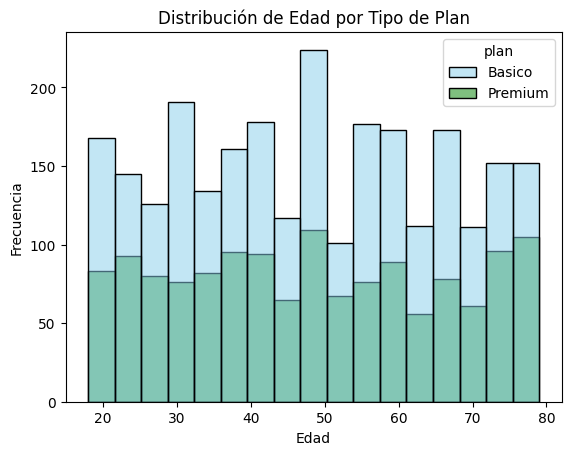

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', palette=['skyblue','green'])
plt.title('Distribución de Edad por Tipo de Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- Distribución simétrica para ambos planes
• Los usuarios Premium tienden a ser ligeramente más jóvenes
• No existe un patrón marcado de edad por tipo de plan

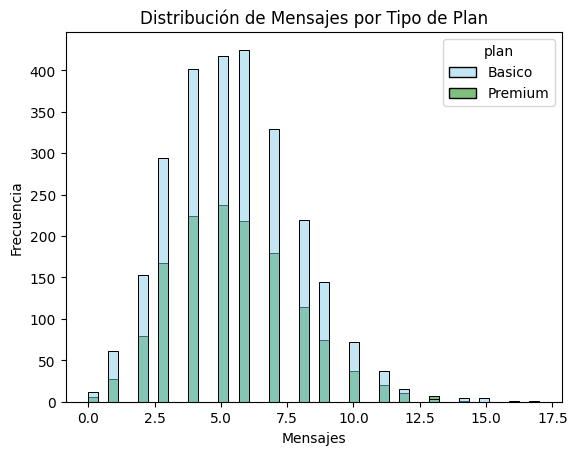

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=['skyblue','green'])
plt.title('Distribución de Mensajes por Tipo de Plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- Distribución sesgada a la derecha
• Los usuarios Premium envían significativamente más mensajes
• Los usuarios Básico se concentran en valores bajos de uso

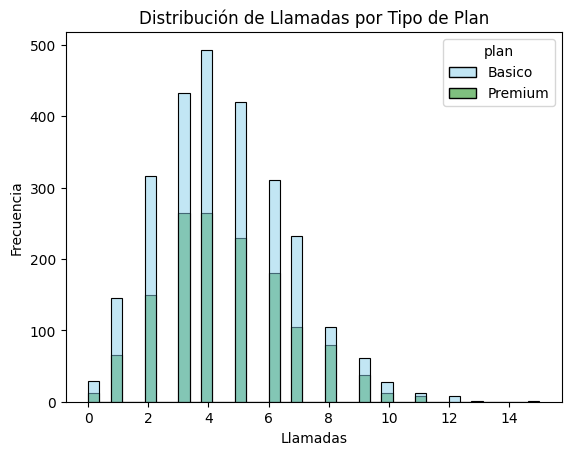

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=['skyblue','green'])
plt.title('Distribución de Llamadas por Tipo de Plan')
plt.xlabel('Llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
 Distribución sesgada a la derecha
• Los usuarios Premium hacen significativamente más llamadas
• Los usuarios Básico se concentran en valores bajos de uso

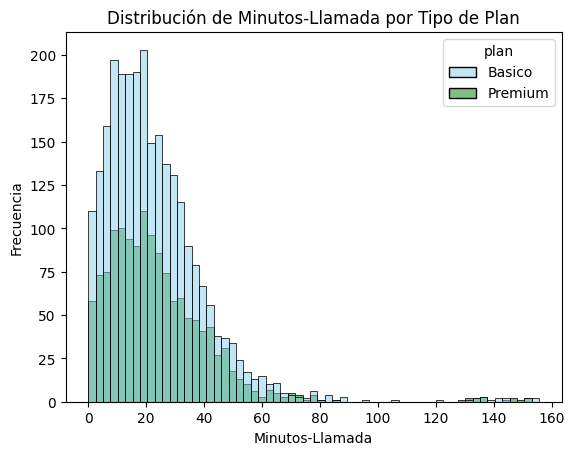

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=['skyblue','green'])
plt.title('Distribución de Minutos-Llamada por Tipo de Plan')
plt.xlabel('Minutos-Llamada')
plt.ylabel('Frecuencia')
plt.show()

💡Insights:
- La mayoría de usuarios tienen un consumo relativamente bajo de minutos
Hay una "cola" hacia la derecha con algunos usuarios que consumen muchos más minutos

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

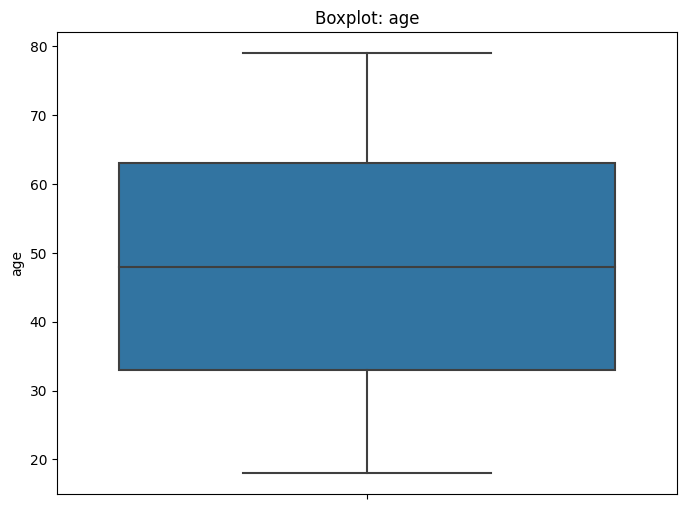

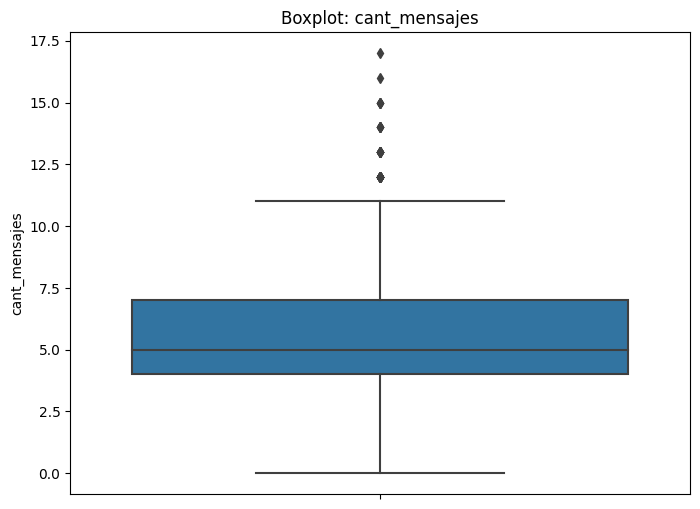

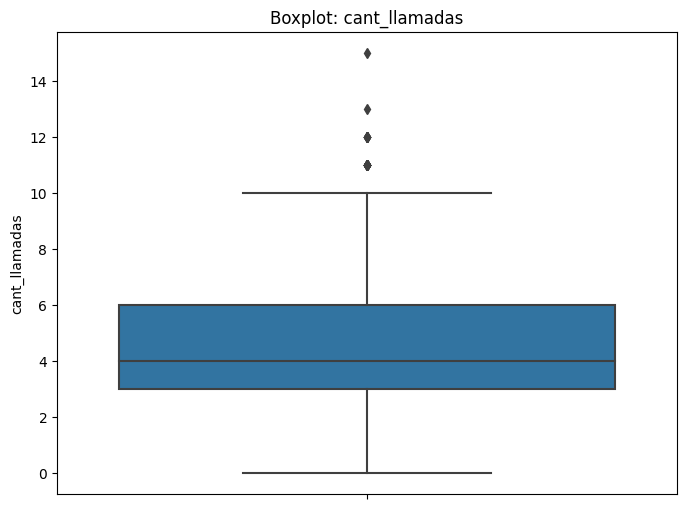

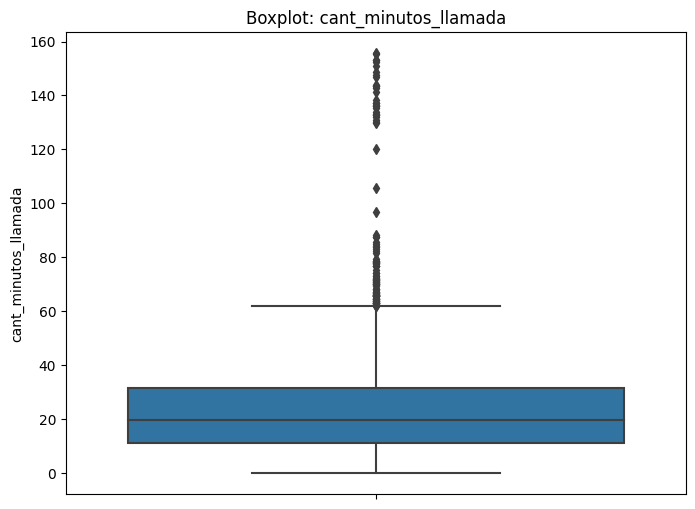

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=user_profile, y=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights:
- Age: ...(presenta o no outliers)
- cant_mensajes: ...
- cant_llamadas: ...
- cant_minutos_llamada: ...

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}")
    print(f"  Q3: {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Límite inferior: {limite_inferior:.2f}")
    print(f"  Límite superior: {limite_superior:.2f}")
    print(f"  Valor máximo actual: {user_profile[col].max():.2f}")




cant_mensajes:
  Q1: 4.00
  Q3: 7.00
  IQR: 3.00
  Límite inferior: -0.50
  Límite superior: 11.50
  Valor máximo actual: 17.00

cant_llamadas:
  Q1: 3.00
  Q3: 6.00
  IQR: 3.00
  Límite inferior: -1.50
  Límite superior: 10.50
  Valor máximo actual: 15.00

cant_minutos_llamada:
  Q1: 11.12
  Q3: 31.41
  IQR: 20.30
  Límite inferior: -19.32
  Límite superior: 61.86
  Valor máximo actual: 155.69


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: mantener o no outliers, porqué?
MANTENER los outliers

Razones:

Límite superior: 11.50 mensajes
Valor máximo: 17 mensajes
Diferencia moderada: Solo 5.5 mensajes por encima del límite
Comportamiento realista: Es perfectamente normal que algunos usuarios envíen 17 mensajes al día
Valor comercial: Estos usuarios "heavy users" son valiosos para el negocio
  
- cant_llamadas: mantener o no outliers, porqué?
MANTENER los outliers

Razones:

Límite superior: 10.50 llamadas
Valor máximo: 15 llamadas
Diferencia pequeña: Solo 4.5 llamadas por encima del límite
Comportamiento normal: 15 llamadas al día es alto pero no imposible
Segmento importante: Usuarios con alto uso de llamadas representan un segmento valioso

- cant_minutos_llamada: mantener o no outliers, porqué?
REVISAR Y POSIBLEMENTE MANTENER

Razones para mantener:

Límite superior: 61.86 minutos
Valor máximo: 155.69 minutos
Diferencia significativa: ~94 minutos por encima del límite
Pero es realista: 2.5 horas de llamadas al día es alto pero posible (usuarios de negocios, call centers, etc.)

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
import numpy as np

user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'Bajo uso',
    np.where(
        (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10),
        'Uso medio',
        'Alto uso'
    )
)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    user_profile['age'] < 30,
    'Joven',
    np.where(
        user_profile['age'] < 60,
        'Adulto',
        'Adulto Mayor'
    )
)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

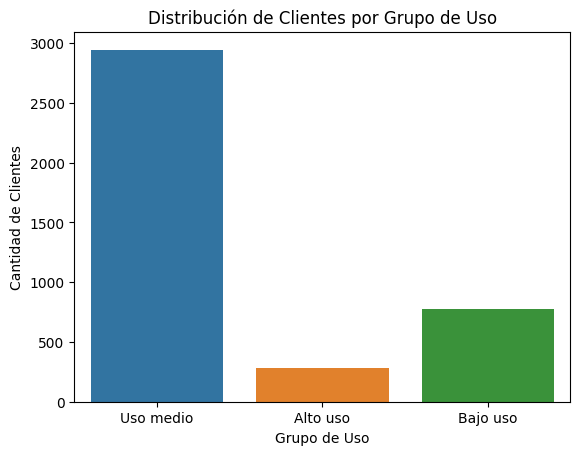

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de Clientes por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Clientes')
plt.show()

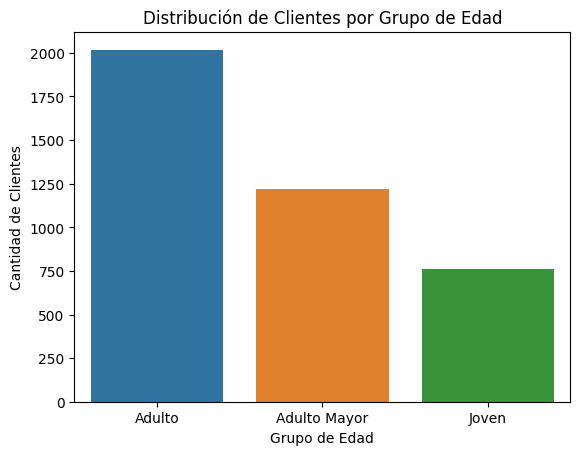

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de Clientes por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?
1. Valores nulos en city, churndate, date, duration y length, con proporciones muy altas en churndate, duration y length.
2. Valores sentinel inválidos: age = -999 y city = "?", además de fechas futuras en regdate (año 2026).
3. Fechas fuera de rango (2026) pese a que el horizonte de datos llega solo hasta 2024.
4. Estructuralmente, duration es nula para textos y length para llamadas, lo que genera muchos nulos “por diseño”.


- ¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
1. city: 469 nulos, 11.73% de las filas en users.
2. churndate: 3 534 nulos, 88.35% de las filas en users.
3. En usage: date 0.13%, duration 55.19%, length 44.74% de nulos.
4. age: 55 filas con valor sentinel -999 (reemplazadas por la mediana).


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
1. Por edad: Joven (≤ 30), Adulto (≤ 60) y Adulto Mayor (> 60).
2. Por uso: Bajo uso (llamadas ≤ 5 y mensajes ≤ 5), Uso medio (llamadas ≤ 10 y mensajes ≤ 10) y Alto uso (resto).
3. Los jóvenes tienden a concentrarse en uso medio y alto, mientras que adultos mayores muestran más presencia en bajo uso.
4. El plan Premium se asocia más con usuarios de mayor uso, especialmente en mensajes y llamadas.

  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
1. Usuarios de Alto uso, ya que concentran más llamadas, mensajes y minutos consumidos.
2. Alta correlación entre uso intenso y contratación del plan Premium, que genera mayor ingreso mensual.
3. Jóvenes y adultos de alto uso son especialmente atractivos por su frecuencia de comunicación.
4. Estos perfiles también son claves para estrategias de retención y venta de add-ons.

- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
1. Outliers en cantmensajes (máx. 17 vs límite ~11.5) y cantllamadas (máx. 15 vs límite ~10.5).
2. Outliers fuertes en cantminutosllamada (máx. 155.69 vs límite ~61.86).
3. Se interpretan como heavy users realistas, no errores de captura.
4. Implican segmentos intensivos en uso que pueden justificar planes específicos de alto consumo.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
1. Crear o ajustar planes de alto uso con más minutos/GB y mejor tarifa marginal para heavy users.
2. Mantener planes Básico/Premium, pero añadir escalones por nivel de uso (bajo, medio, alto) con beneficios diferenciados.
3. Ofrecer add-ons de minutos y mensajes a los usuarios de uso medio que se acercan a los límites actuales.
4. Diseñar campañas específicas para jóvenes y adultos de alto uso en Premium, enfocadas en fidelización.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
1. Nulos significativos en city, churndate, duration y length.
2. Sentinels -999 en age y "?" en city que se tuvieron que convertir a NaN.
3. Fechas imposibles en regdate con año 2026.
4. Alta proporción de nulos estructurales por tipo de uso (texto vs llamada).

🔍 **Segmentos por Edad**
1. Joven: hasta 30 años, uso relativamente más alto de mensajes y llamadas.
2. Adulto: 31 a 60 años, representa el grueso de la base con uso medio.
3. Adulto Mayor: más de 60 años, tiende a concentrarse en bajo uso.
4. No hay un patrón extremo por edad, pero Premium está algo más presente en edades menores.

📊 **Segmentos por Nivel de Uso**
1. Bajo uso: pocos mensajes y llamadas, perfil sensible a precio fijo bajo.
2. Uso medio: consumo moderado, candidatos a cross-sell de add-ons o upgrades.
3. Alto uso: heavy users con muchos mensajes, llamadas y minutos.
4. El segmento de alto uso se asocia más con el plan Premium y mayor valor para el negocio.

➡️ Esto sugiere que ...


💡 **Recomendaciones**
1. Completar limpieza de sentinels y fechas, manteniendo nulos estructurales donde corresponda.
2. Diseñar planes escalonados por nivel de uso (bajo/medio/alto) y enfocar Premium en alto uso.
3. Crear ofertas específicas para jóvenes de alto uso (datos, mensajes ilimitados o casi ilimitados).
4. Analizar churn con más detalle cuando haya suficiente información en churndate para segmentar riesgo.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`